In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

2022-11-20 21:44:32.286526: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
path = 'clothing-dataset-small/train/t-shirt'
name = '5e04aaf0-8c4e-40d4-b1fa-738f572b66bc.jpg'
fullname = f'{path}/{name}'
fullname

'clothing-dataset-small/train/t-shirt/5e04aaf0-8c4e-40d4-b1fa-738f572b66bc.jpg'

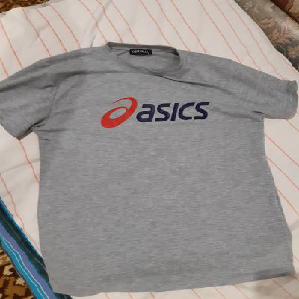

In [4]:
img = load_img(fullname,target_size = (299,299))
img

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

In [6]:
# create Xception model
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-20 21:44:39.884921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 21:44:39.891386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 21:44:39.892041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 21:44:39.892992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
X = np.array([x])

In [8]:
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [10]:
X[0]

array([[[-0.2235294 , -0.56078434, -0.6862745 ],
        [-0.27058822, -0.60784316, -0.7411765 ],
        [-0.3490196 , -0.6862745 , -0.8352941 ],
        ...,
        [ 0.18431377, -0.00392157, -0.20784312],
        [ 0.19215691,  0.00392163, -0.19999999],
        [ 0.16078436, -0.02745098, -0.23137254]],

       [[-0.4588235 , -0.79607844, -0.94509804],
        [-0.41960782, -0.7490196 , -0.92156863],
        [-0.42745095, -0.75686276, -0.94509804],
        ...,
        [ 0.13725495, -0.05098039, -0.25490195],
        [ 0.14509809, -0.04313725, -0.24705881],
        [ 0.1686275 , -0.01960784, -0.2235294 ]],

       [[-0.29411763, -0.6156863 , -0.8352941 ],
        [-0.3490196 , -0.67058825, -0.8901961 ],
        [-0.40392154, -0.7254902 , -0.9607843 ],
        ...,
        [ 0.11372554, -0.0745098 , -0.27843136],
        [ 0.10588241, -0.08235294, -0.2862745 ],
        [ 0.17647064, -0.01176471, -0.21568626]],

       ...,

       [[ 0.21568632,  0.00392163, -0.23137254],
        [-0

In [11]:
pred = model.predict(X)

2022-11-20 21:44:43.666498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 21:44:44.313095: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 21:44:44.314016: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 21:44:44.314057: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 21:44:44.315095: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 21:44:44.315192: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [12]:
pred.shape

(1, 1000)

In [13]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.38413036),
  ('n04370456', 'sweatshirt', 0.32687798),
  ('n04599235', 'wool', 0.03152859),
  ('n02916936', 'bulletproof_vest', 0.008037983),
  ('n02963159', 'cardigan', 0.007885073)]]

**Convolutional Neural Network**

Take Image -> turn to a vector representation -> convert to inner representation matrix(dense layers manipulation) -> output layer(prediction of image taken)

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [16]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
X, y = next(train_ds)

In [18]:
X.shape

(32, 150, 150, 3)

In [19]:
y.shape

(32, 10)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150,150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


* 32 - size of batch
* 5 - width
* 5 - height
* 2048 - number of layers in image

When we take something of a bigger dimension and reduce it to a smaller size, it is called **Pooling**

Now we have reduced the base output to a 2D array through pooling, we wanna condese it in a form that we can use to make predictions.

We have 10 classes we wanna predict, hence we will have to condese the results of the pooling + model building into a 10-row vector

In [21]:
base_model = Xception(
    weights='imagenet', 
    include_top=False, # we are removing 'ImageNet' Dense Layers but we wanna use the Convulotion Layers
    input_shape=(150, 150, 3)
)

base_model.trainable = False # when we train the model, we don't wanna change Conv. layers

# creating new Dense Layers
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

# wanna reduce base image rep from 4D to vectors of a 2D
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = keras.layers.Dense(10)(vectors) # we have 10 classes to predict out

model = keras.Model(inputs, outputs)

In [22]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [23]:
preds.shape

(32, 10)

In [24]:
# we use an optimizer to tell the model how to configure the weights when building the model.
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [25]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 167ms/step - loss: 1.2875 - accuracy: 0.6646 - val_loss: 0.9003 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.6081 - accuracy: 0.8080 - val_loss: 0.9396 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3706 - accuracy: 0.8758 - val_loss: 0.8180 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2144 - accuracy: 0.9205 - val_loss: 0.7947 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1442 - accuracy: 0.9488 - val_loss: 0.8659 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.0959 - accuracy: 0.9641 - val_loss: 0.8491 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.0564 - accuracy: 0.9840 - val_loss: 0.8174 - val_accuracy: 0.8182

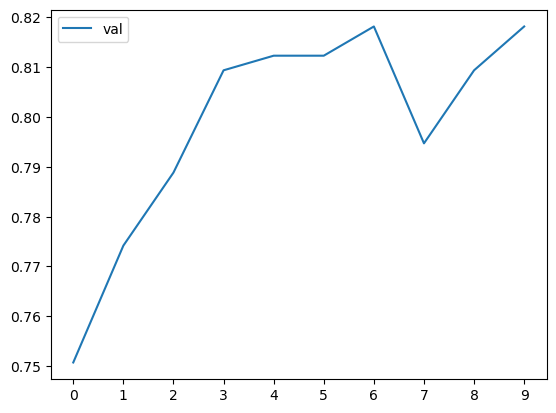

In [27]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))

plt.legend()

In [28]:
def make_model(learning_rate=0.01):

    base_model = Xception(
    weights='imagenet', 
    include_top=False, # we are removing 'ImageNet' Dense Layers but we wanna use the Convulotion Layers
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False # when we train the model, we don't wanna change Conv. layers

    ####################################################################################
    # creating new Dense Layers
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    # wanna reduce base image rep from 4D to vectors of a 2D
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    outputs = keras.layers.Dense(10)(vectors) # we have 10 classes to predict out
    model = keras.Model(inputs, outputs)
    ####################################################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [29]:
# adjusting the learning rate
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 130ms/step - loss: 2.0930 - accuracy: 0.2741 - val_loss: 1.7407 - val_accuracy: 0.4370
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.4739 - accuracy: 0.5329 - val_loss: 1.3333 - val_accuracy: 0.5894
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 1.1935 - accuracy: 0.6209 - val_loss: 1.1268 - val_accuracy: 0.6862
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 1.0360 - accuracy: 0.6695 - val_loss: 0.9975 - val_accuracy: 0.7038
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9325 - accuracy: 0.7001 - val_loss: 0.9136 - val_accuracy: 0.7273
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8586 - accuracy: 0.7304 - val_loss: 0.8526 - val_accuracy: 0.7419
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8016 - accuracy: 0.7480 - val_loss: 0.8056 - val_accuracy:

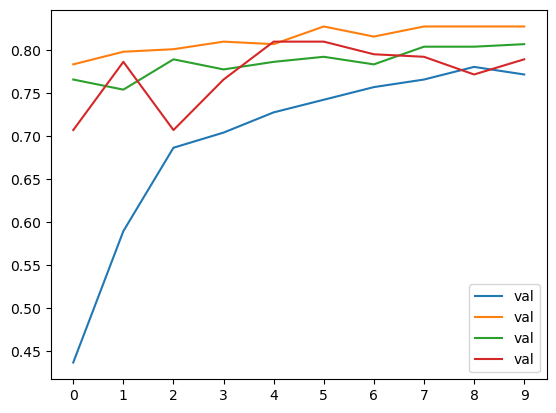

In [30]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=lr)
    plt.plot(hist['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [31]:
learning_rate = 0.001

In [32]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [33]:
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 136ms/step - loss: 1.1038 - accuracy: 0.6307 - val_loss: 0.7020 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 12s 126ms/step - loss: 0.6361 - accuracy: 0.7813 - val_loss: 0.6132 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5096 - accuracy: 0.8341 - val_loss: 0.5814 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 12s 128ms/step - loss: 0.4256 - accuracy: 0.8660 - val_loss: 0.5528 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 12s 127ms/step - loss: 0.3724 - accuracy: 0.8862 - val_loss: 0.5298 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3247 - accuracy: 0.9055 - val_loss: 0.5581 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2924 - accuracy: 0.9169 - val_loss: 0.5495 - val_accuracy: 0.8152

In [34]:
def make_model(learning_rate=0.01, size_inner=100):

    base_model = Xception(
    weights='imagenet', 
    include_top=False, # we are removing 'ImageNet' Dense Layers but we wanna use the Convulotion Layers
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False # when we train the model, we don't wanna change Conv. layers

    ####################################################################################
    # creating new Dense Layers
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    # wanna reduce base image rep from 4D to vectors of a 2D
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner) # we have 10 classes to predict out
    model = keras.Model(inputs, outputs)
    ####################################################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [35]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 16s 140ms/step - loss: 1.3047 - accuracy: 0.5596 - val_loss: 0.8928 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7863 - accuracy: 0.7331 - val_loss: 0.7081 - val_accuracy: 0.7625
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.6280 - accuracy: 0.7898 - val_loss: 0.6468 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5367 - accuracy: 0.8230 - val_loss: 0.6279 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4679 - accuracy: 0.8484 - val_loss: 0.5873 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4196 - accuracy: 0.8690 - val_loss: 0.5916 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3702 - accuracy: 0.8820 - val_loss: 0.5783 - val_accuracy: 0.8

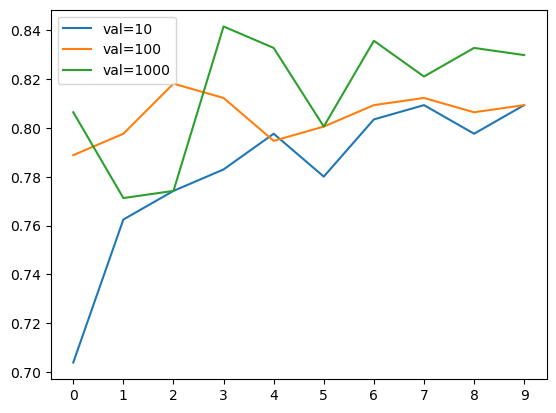

In [36]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label='val={}'.format(size))
plt.xticks(np.arange(10))
plt.legend()

In [37]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [38]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 0.9633 - accuracy: 0.6666 - val_loss: 0.6166 - val_accuracy: 0.7947
Epoch 2/30
96/96 [==============================] - 12s 124ms/step - loss: 0.5066 - accuracy: 0.8272 - val_loss: 0.5986 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 12s 122ms/step - loss: 0.3582 - accuracy: 0.8823 - val_loss: 0.5472 - val_accuracy: 0.8182
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2484 - accuracy: 0.9237 - val_loss: 0.6007 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1814 - accuracy: 0.9478 - val_loss: 0.5856 - val_accuracy: 0.7889
Epoch 6/30
96/96 [==============================] - 12s 121ms/step - loss: 0.1275 - accuracy: 0.9671 - val_loss: 0.5883 - val_accuracy: 0.8065
Epoch 7/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0871 - accuracy: 0.9866 - val_loss: 0.6924 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.7764 - val_accuracy: 0.8211
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.7854 - val_accuracy: 0.8211
Epoch 30/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.8062 - val_accuracy: 0.8299


0.5
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 1.2741 - accuracy: 0.5688 - val_loss: 0.7290 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 12s 123ms/step - loss: 0.8173 - accuracy: 0.7197 - val_loss: 0.6590 - val_accuracy: 0.7859
Epoch 3/30
96/96 [==============================] - 12s 125ms/step - loss: 0.7059 - accuracy: 0.7480 - val_loss: 0.5980 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6035 - accuracy: 0.7894 - val_loss: 0.5759 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6827 - accuracy: 0.7304 - val_loss: 0.5665 - val_accuracy: 0.8182
Epoch 26/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6580 - accuracy: 0.7370 - val_loss: 0.5900 - val_accuracy: 0.8006
Epoch 27/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6622 - accuracy: 0.7419 - val_loss: 0.5553 - val_accuracy: 0.8123
Epoch 28/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6526 - accuracy: 0.7425 - val_loss: 0.5620 - val_accuracy: 0.8035
Epoch 29/30
96/96 [==============================] - 12s 122ms/step - loss: 0.6571 - accuracy: 0.7386 - val_loss: 0.5422 - val_accuracy: 0.8211
Epoch 30/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6661 - accuracy: 0.7347 - val_loss: 0.5485 - val_accuracy: 0.8211




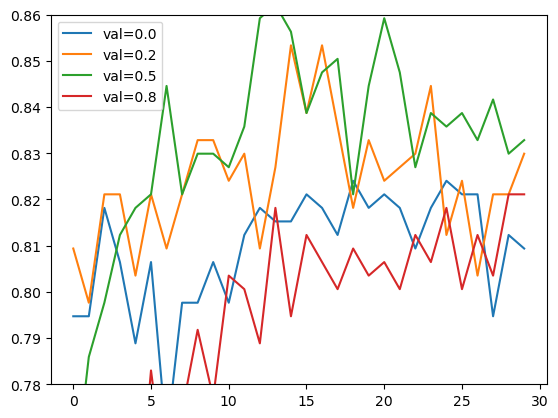

In [39]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

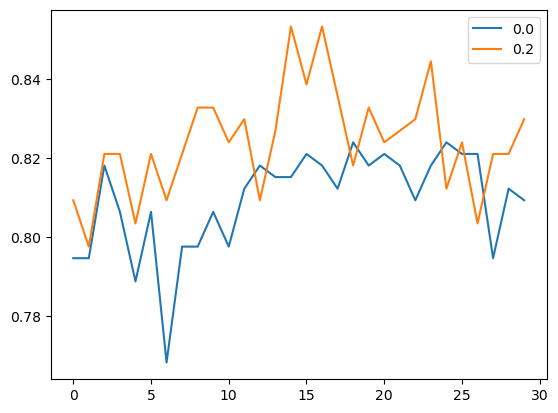

In [40]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

In [41]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 15s 133ms/step - loss: 1.0516 - accuracy: 0.6392 - val_loss: 0.6582 - val_accuracy: 0.7830
Epoch 2/50
96/96 [==============================] - 12s 123ms/step - loss: 0.5913 - accuracy: 0.7969 - val_loss: 0.5915 - val_accuracy: 0.7947
Epoch 3/50
96/96 [==============================] - 12s 122ms/step - loss: 0.4816 - accuracy: 0.8269 - val_loss: 0.5524 - val_accuracy: 0.8123
Epoch 4/50
96/96 [==============================] - 12s 123ms/step - loss: 0.3597 - accuracy: 0.8732 - val_loss: 0.5303 - val_accuracy: 0.8211
Epoch 5/50
96/96 [==============================] - 12s 123ms/step - loss: 0.2781 - accuracy: 0.9078 - val_loss: 0.5348 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 12s 124ms/step - loss: 0.2311 - accuracy: 0.9289 - val_loss: 0.5569 - val_accuracy: 0.8182
Epoch 7/50
96/96 [==============================] - 12s 124ms/step - loss: 0.1767 - accuracy: 0.9472 - val_loss: 0.5466 - val_accuracy: 0.8299

KeyboardInterrupt: 

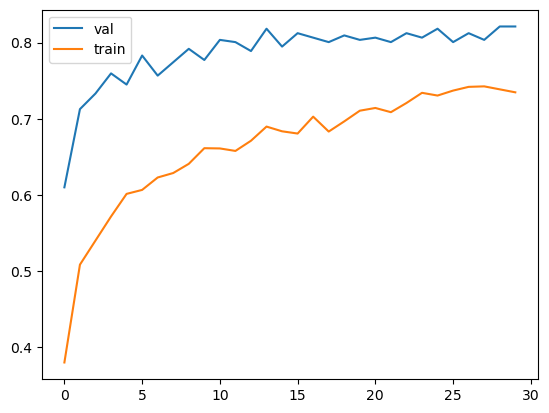

In [43]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [44]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [45]:
input_size = 299

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [48]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 75s 740ms/step - loss: 1.0102 - accuracy: 0.6838 - val_loss: 0.5571 - val_accuracy: 0.8270
Epoch 2/50
96/96 [==============================] - 68s 711ms/step - loss: 0.5213 - accuracy: 0.8263 - val_loss: 0.4433 - val_accuracy: 0.8504
Epoch 3/50
96/96 [==============================] - 68s 703ms/step - loss: 0.4325 - accuracy: 0.8533 - val_loss: 0.4231 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 68s 710ms/step - loss: 0.3799 - accuracy: 0.8729 - val_loss: 0.4255 - val_accuracy: 0.8534
Epoch 5/50
96/96 [==============================] - 67s 695ms/step - loss: 0.3408 - accuracy: 0.8843 - val_loss: 0.4055 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 68s 706ms/step - loss: 0.3123 - accuracy: 0.8941 - val_loss: 0.3687 - val_accuracy: 0.8651
Epoch 7/50
96/96 [==============================] - 66s 689ms/step - loss: 0.2947 - accuracy: 0.8983 - val_loss: 0.3697 - val_accuracy: 0.8739

KeyboardInterrupt: 

In [2]:
print(2)

2


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

2022-11-20 23:23:40.377303: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [5]:
model = keras.models.load_model('xception_v4_1_10_0.891.h5')

2022-11-20 23:24:30.476306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 23:24:30.483676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 23:24:30.484523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 23:24:30.485468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [6]:
model.evaluate(test_ds)

2022-11-20 23:24:43.946979: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 23:24:44.591879: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 23:24:44.592788: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 23:24:44.592830: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 23:24:44.593792: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 23:24:44.593882: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


12/12 [==============================] - 7s 279ms/step - loss: 0.2608 - accuracy: 0.8925


[0.26081421971321106, 0.8924731016159058]

In [7]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

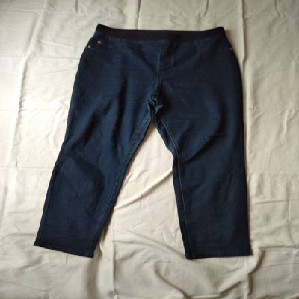

In [15]:
img = load_img(path, target_size=(299, 299))
img

In [9]:
import numpy as np

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

1/1 [==============================] - 1s 895ms/step


In [13]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [14]:
dict(zip(classes, pred[0]))

{'dress': -2.5721345,
 'hat': -3.5928378,
 'longsleeve': -1.2573262,
 'outwear': -2.8270047,
 'pants': 8.492762,
 'shirt': -2.0799308,
 'shoes': -3.9215748,
 'shorts': 3.592294,
 'skirt': -2.7443092,
 't-shirt': -2.0618427}